<a href="https://colab.research.google.com/github/arthurvteles/treinamento-h2ia/blob/main/ID3_Dataset_Cars_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementação de Árvore de Decisão -- Algoritmo ID3

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Implemente uma árvore de decisão ID3 para a predição da variável "NCAP Rating" no dataset
cars-india-dataset. Ela consiste em um score de segurança do veículo: maior o valor, mais seguro é o carro.

Dataset download: https://www.kaggle.com/datasets/vysakhvms/cars-india-dataset

(pode ser necessário registro no Kaggle)

In [172]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [173]:
import pandas as pd
import numpy as np

cars_df = pd.read_csv("/content/drive/MyDrive/data/Cars India Dataset.csv")
cars_df

,Model,Maker,Type,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,...,Rear Brake,Drive,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Emission Type,Tyre Size,Variants,NCAP Rating
0,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,19.40,BS VI,205/55 R16,3,Not Tested
1,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,18.12,BS VI,205/55 R16,2,Not Tested
2,Virtus,Volkswagen,Sedan,5,1498.0,4561,1752,1507,2651,4.0,...,Drum,2WD,5.05,45.0,521.0,18.67,BS VI,205/55 R16,1,Not Tested
3,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,19.20,BS VI,205/55 R17,3,5
4,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,17.23,BS VI,205/55 R17,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Harrier,Tata,SUV,5,1956.0,4598,1894,1706,2741,4.0,...,Drum,2WD,5.75,50.0,425.0,14.60,BS VI,235/70 R16,17,6
152,Safari,Tata,SUV,6,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,16.14,BS VI,235/60 R18,2,6
153,Safari,Tata,SUV,6,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,14.08,BS VI,235/60 R18,2,6
154,Safari,Tata,SUV,7,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,16.14,BS VI,235/60 R18,20,6


<Axes: >

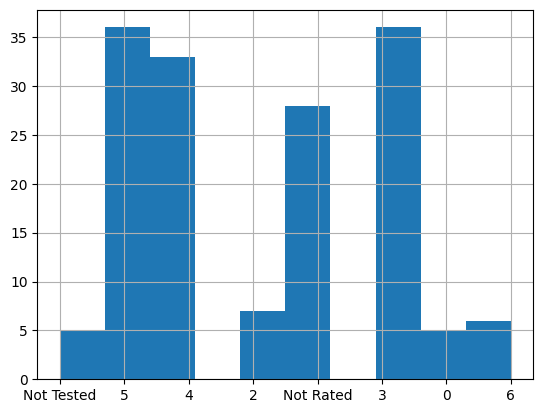

In [174]:
# NCAP Rating distribution
cars_df["NCAP Rating"].hist()

In [175]:
# how to bin numerical data example (quantile-based discretization)
#       documentation: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

cars_df["Categorical Fuel Tank Capacity"], cut_bin = pd.qcut(cars_df["Fuel Tank Capacity"],
                                                             q=3,
                                                             labels=['C', 'B', 'A'],
                                                             retbins=True)
cars_df.describe()


,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Variants
count,156.000000,155.000000,156.000000,156.000000,156.000000,156.000000,155.000000,137.000000,155.000000,141.000000,133.000000,156.000000
mean,5.538462,1598.109677,4324.455128,1800.512821,1653.666667,2633.358974,3.870968,5.247080,48.725806,377.673759,18.028947,2.871795
std,1.018440,504.656969,325.767389,79.050452,125.170559,128.228372,0.389966,0.284181,10.997815,105.015951,3.273723,2.864055
min,2.000000,799.000000,3731.000000,1579.000000,1370.000000,2422.000000,3.000000,4.700000,28.000000,180.000000,9.000000,1.000000
25%,5.000000,1197.000000,3995.000000,1751.500000,1544.000000,2500.000000,4.000000,5.100000,40.000000,296.000000,16.200000,1.000000
50%,5.000000,1493.000000,4315.000000,1790.000000,1631.000000,2610.000000,4.000000,5.200000,50.000000,392.000000,18.100000,2.000000
75%,6.000000,1999.000000,4598.000000,1855.000000,1755.000000,2750.000000,4.000000,5.300000,57.000000,447.000000,20.250000,3.000000
max,9.000000,3799.000000,5115.000000,2099.000000,1995.000000,3060.000000,6.000000,5.900000,80.000000,625.000000,28.000000,20.000000


In [176]:
cars_df['Length'] = pd.to_numeric(cars_df['Length'], downcast = 'float')


In [177]:
cars_df['No_of_Cylinders']=cars_df['No_of_Cylinders'].fillna(cars_df['No_of_Cylinders'].mean())


In [178]:
cars_df['Length'] = pd.cut(cars_df.Length, bins=np.quantile(cars_df['Length'], [0,0.25,0.5,0.75,1]), labels=['Small', 'Medium', 'Big', ' Enormous'])
cars_df['Width'] = pd.cut(cars_df.Width, bins=np.quantile(cars_df['Width'], [0,0.25,0.5,0.75,1]), labels=['Short', 'Medium', 'Large', 'Enormous'])
cars_df['Height'] = pd.cut(cars_df.Height, bins=np.quantile(cars_df['Height'], [0,0.25,0.5,0.75,1]), labels=['Short', 'Medium', 'Large', 'Enormous'] )
cars_df['Wheelbase'] = pd.cut(cars_df.Wheelbase, bins=np.quantile(cars_df['Wheelbase'], [0,0.25,0.5,0.75,1]), labels=['Short', 'Medium', 'Large', 'Enormous'] )
cars_df.loc[cars_df['No_of_Cylinders'] == 3.0, 'No_of_Cylinders' ]='Three'
cars_df.loc[cars_df['No_of_Cylinders'] == 4.0, 'No_of_Cylinders' ]='Four'
cars_df.loc[cars_df['No_of_Cylinders'] == 5.0, 'No_of_Cylinders' ]='Five'
cars_df.loc[cars_df['No_of_Cylinders'] == 6.0, 'No_of_Cylinders' ]='Six'
cars_df['Turning Radius'] = pd.cut(cars_df.Turning Radius, bins=np.quantile(cars_df['Turning Radius'], [0,0.25,0.5,0.75,1]) , labels=['Short','Medium', 'Large' , 'Enormous'])

cars_df

SyntaxError: ignored